dx:	6.0, dy:	1.25
car_len:	 4.786
para. slot width suggested:	 7.178999999999999
PARKING_OFFSET:	 -1.4529999999999998
ang_rad:	0.20539538918976738, ang:	11.768288932020644


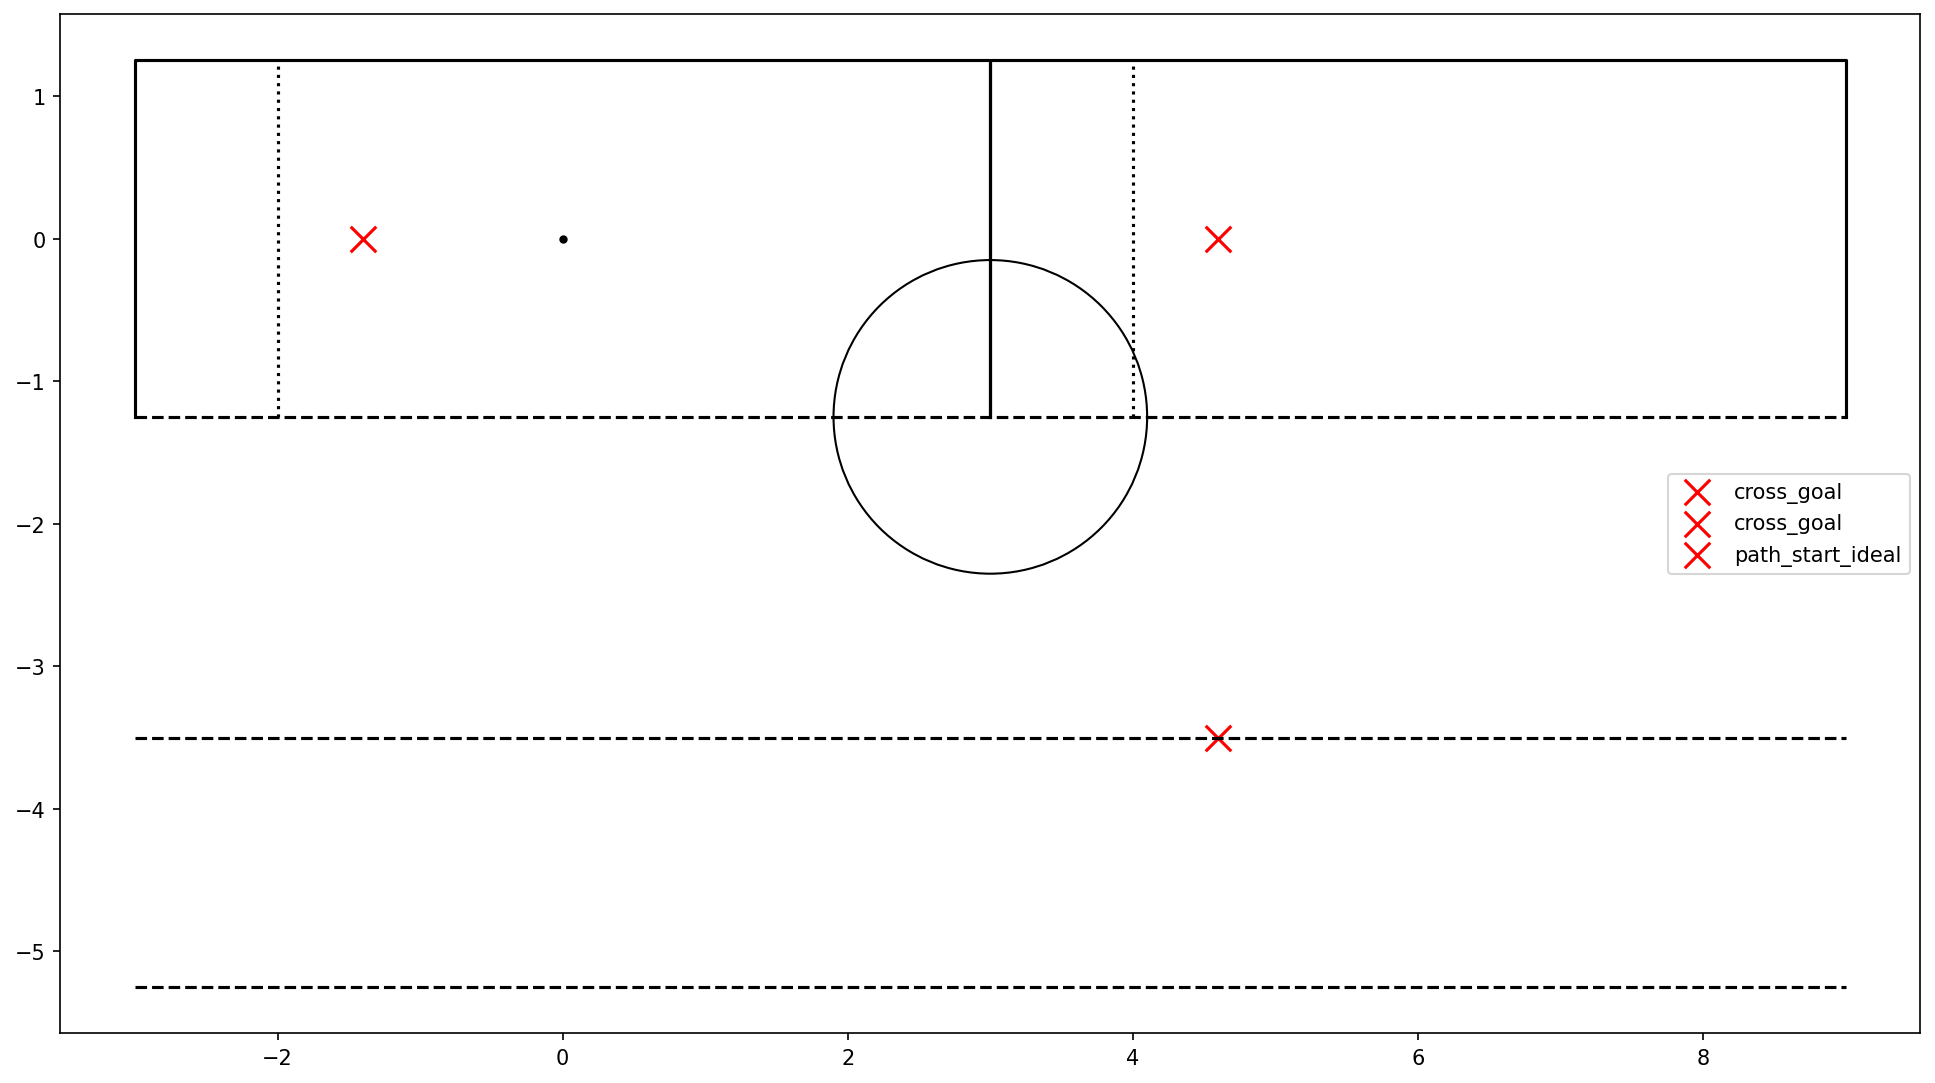

In [4]:
#!/usr/bin/env python
# coding: utf-8

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


##############################################################################################################
######################### define constant
slot_border_long = 6
slot_border_short = 2.5
slot_lane_width = 4

# t-target, s-side; x, y
pt_a_t = [-3, -1.25]
pt_b_t = [3, -1.25]
pt_c_t = [3, 1.25]
pt_d_t = [-3, 1.25]
pt_a_s = [3, -1.25]
pt_b_s = [9, -1.25]
pt_c_s = [9, 1.25]
pt_d_s = [3, 1.25]

# slot_point_1_x = [3, 3, -3, -3]
# slot_point_1_y = [-1.25, 1.25, 1.25, -1.25]
# slot_point_2_x = [9, 9, 3, 3]
# slot_point_2_y = [-1.25, 1.25, 1.25, -1.25]

slot_pt_abcd_target = [pt_a_t, pt_b_t, pt_c_t, pt_d_t]  # [[x, y], ..]: ABCD
slot_pt_abcd_side = [pt_a_s, pt_b_s, pt_c_s, pt_d_s]

g_REAR_WHEEL_AXIS = 0.94
g_FRONT_WHEEL_AXIS = 0.926
g_FRONT_REAR_WHEEL_LEN = 2.92



##############################################################################################################
######################### calcualte target_pose

car_len = g_REAR_WHEEL_AXIS + g_FRONT_WHEEL_AXIS + g_FRONT_REAR_WHEEL_LEN;
PARKING_OFFSET = -1 * (car_len/2 - g_REAR_WHEEL_AXIS);

# double dx = double(ptBC.x - ptAD.x);
# double dy = double(ptBC.y - ptAD.y);
# ang_rad = atan2(dy, dx);
# ang = float(RADIANS_TO_DEGREES(ang_rad));

# x = ptCenter.x + PARKING_OFFSET * cos(ang_rad) + HORIZONTAL_PARKING_OFFSET * sin(ang_rad);
# y = ptCenter.y + PARKING_OFFSET * sin(ang_rad) - HORIZONTAL_PARKING_OFFSET * cos(ang_rad);

# pt_bc = [0, 0]  # x, y 
# pt_ad = [0, 0]

pt_bc = [(pt_b_t[0] + pt_c_t[0]) / 2, (pt_b_t[1] + pt_c_t[1]) / 2]  # x, y
pt_ad = [(pt_a_t[0] + pt_a_t[0]) / 2, (pt_a_t[1] + pt_a_t[1]) / 2]

dx = pt_bc[0] - pt_ad[0]
dy = pt_bc[1] - pt_ad[1]
print("dx:\t{}, dy:\t{}".format(dx, dy))

ang_rad = math.atan2(dy, dx)
ang = math.degrees(ang_rad)

print("car_len:\t",car_len)
print("para. slot width suggested:\t", 1.5 * car_len)
print("PARKING_OFFSET:\t", PARKING_OFFSET)
print("ang_rad:\t{}, ang:\t{}".format(ang_rad, ang))


##############################################################################################################
######################### plot env. objects

plt.figure(figsize=(16,9), dpi=150) # parallel
# plt.figure(figsize=(10,10), dpi=150) # perpendicular

plt.axis("equal")

# 0. plot graph frame center
graph_center_x = [0]
graph_center_y = [0]
plt.plot(graph_center_x, graph_center_x, marker=".", color="k")


# 7. plot parking slot
slot_point_1_x = [slot_pt_abcd_target[1][0], slot_pt_abcd_target[2][0], slot_pt_abcd_target[3][0], slot_pt_abcd_target[0][0]]
slot_point_1_y = [slot_pt_abcd_target[1][1], slot_pt_abcd_target[2][1], slot_pt_abcd_target[3][1], slot_pt_abcd_target[0][1]]
slot_point_2_x = [slot_pt_abcd_side[1][0], slot_pt_abcd_side[2][0], slot_pt_abcd_side[3][0], slot_pt_abcd_side[0][0]]
slot_point_2_y = [slot_pt_abcd_side[1][1], slot_pt_abcd_side[2][1], slot_pt_abcd_side[3][1], slot_pt_abcd_side[0][1]]
plt.plot(slot_point_1_x, slot_point_1_y, color="k")
plt.plot(slot_point_2_x, slot_point_2_y, color="k")


# 8. plot circle
circle_1 = plt.Circle((slot_point_1_x[0], slot_point_2_y[0]), 1.1, fill=False)
plt.gca().add_patch(circle_1)


# 9. plot stopper
stopper_1_x = [-2, -2]
stopper_1_y = [-1.25, 1.25]
stopper_2_x = [4, 4]
stopper_2_y = [-1.25, 1.25]
plt.plot(stopper_1_x, stopper_1_y, linestyle="dotted", color="k")
plt.plot(stopper_2_x, stopper_2_y, linestyle="dotted", color="k")


# 10. plot cross_goal
cross_goal_1_x = [-1.4]
cross_goal_1_y = [0]
cross_goal_2_x = [4.6]
cross_goal_2_y = [0]
plt.scatter(cross_goal_1_x, cross_goal_1_y, label="cross_goal", marker='x', color='r', s=150)
plt.scatter(cross_goal_2_x, cross_goal_2_y, label="cross_goal", marker='x', color='r', s=150)


# 11. plot lane 4 meters 
lane_1_x = [-3, 9]
lane_1_y = [-1.25, -1.25]
lane_2_x = [-3, 9]
lane_2_y = [-5.25, -5.25]
plt.plot(lane_1_x, lane_1_y, linestyle="dashed", color="k")
plt.plot(lane_2_x, lane_2_y, linestyle="dashed", color="k")


# 12. ideal path start pose
path_start_ideal_x = [4.6]
path_start_ideal_y = [-3.5]
plt.scatter(path_start_ideal_x, path_start_ideal_y, label="path_start_ideal", marker='x', color='r', s=150)


# 13. plot auxiliary start line 
aux_start_lane_x = [-3, 9]
aux_start_lane_y = [-3.5, -3.5]
plt.plot(aux_start_lane_x, aux_start_lane_y, linestyle="dashed", color="k")



plt.legend(loc="best")

plt.show()